## Machine Learning for Time Series Data in Python
This chapter is an introduction to the basics of machine learning, time series data, and the intersection between the two. This is the Summary of lecture "Machine Learning for Time Series Data in Python", via datacamp.

 - ### Time Series and Machine Learning Primer Chapter 1: 

#### What makes a time series?

Timeseries data consists of at least two things: One, an array of numbers that represents the data itself. Two, another array that contains a timestamp for each datapoint. The timestamps can include a wide range of time data, from months of the year to nanoseconds.

 #### Why machine learning?
 
 - Machine learning has taken the world of data science by storm. In the last few decades, advances in computing power, algorithms, and community practices have made it possible to use computers to ask questions that were never thought possible. Machine learning is about finding patterns in data - often patterns that are not immediately obvious to the human eye. This is often because the data is either too large or too complex to be processed by a human.

 - Another crucial part of machine learning is that we can build a model of the world that formalizes our knowledge of the problem at hand. We can use this model to make predictions. Combined with automation, this can be a critical component of an organization's decision making.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')
from sklearn.svm import LinearSVC
from sklearn import linear_model
import librosa as lr
from glob import glob


#### 1:A -  Plotting a time series (I)
In this exercise, you'll practice plotting the values of two time series without the time component.

Two DataFrames, data and data2 are available in your workspace.

Unless otherwise noted, assume that all required packages are loaded with their common aliases throughout this course.

Note: This course assumes some familiarity with time series data, as well as how to use them in data analytics pipelines. For an introduction to time series, we recommend the Introduction to Time Series Analysis in Python and Visualizing Time Series Data with Python courses.

In [2]:
data = pd.read_csv('./dataset/data.csv', index_col=0)
data2 = pd.read_csv('./dataset/data2.csv', index_col=0)

In [3]:
#Print the first five rows of data.
#Print the first five rows of data2.

print(data.head(5))
print(data2.head(5))

   data_values
0   214.009998
1   214.379993
2   210.969995
3   210.580000
4   211.980005
   data_values
0    -0.006928
1    -0.007929
2    -0.008900
3    -0.009815
4    -0.010653


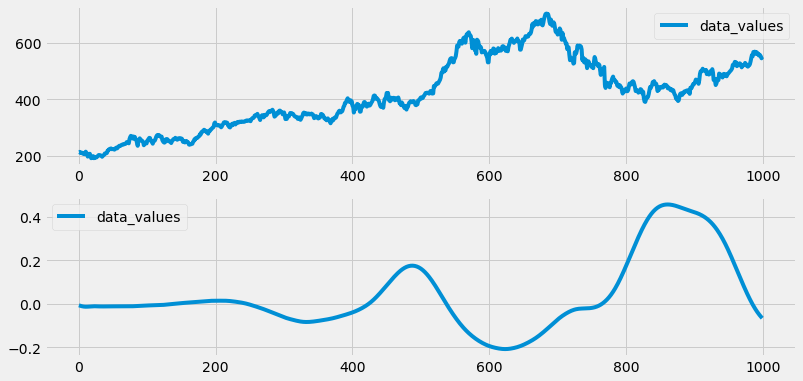

In [4]:
#Plot the values column of both the data sets on top of one another, one per axis object.

fig,axs = plt.subplots(2, 1, figsize=(12, 6))
data.iloc[:1000].plot(y="data_values", ax=axs[0])
data2.iloc[:1000].plot(y="data_values", ax=axs[1])
plt.show()

#### 1 B:  Plotting a time series (II)
You'll now plot both the datasets again, but with the included time stamps for each (stored in the column called "time"). Let's see if this gives you some more context for understanding each time series dat

In [5]:
data = pd.read_csv('./dataset/data_time.csv', index_col=0)
data2 = pd.read_csv('./dataset/data_time2.csv', index_col=0)

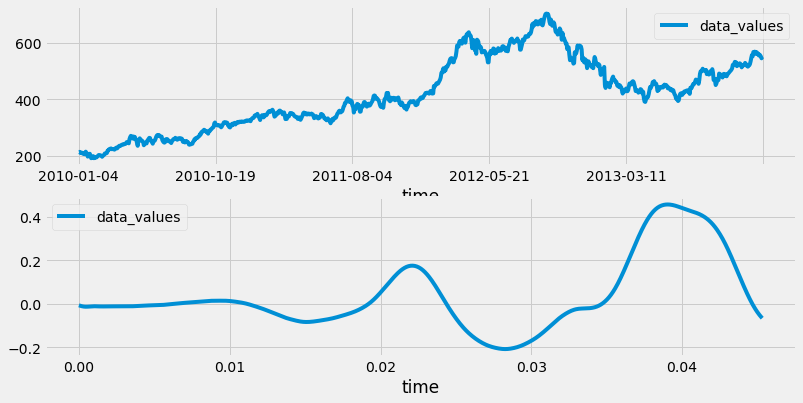

In [13]:
# Plot data and data2 on top of one another, one per axis object.
# The x-axis should represent the time stamps and the y-axis should represent the dataset values.

fig, axs = plt.subplots(2, 1, figsize=(12, 6))
data.iloc[:1000].plot(x="time", y="data_values", ax=axs[0])
data2.iloc[:1000].plot(x="time", y="data_values", ax=axs[1])
plt.show()

note: Correct! As you can now see, each time series has a very different sampling frequency (the amount of time between samples). The first is daily stock market data, and the second is an audio waveform.

### 2 : Machine learning basics

We'll start with the basics of how to fit and predict a model using scikit-learn.

 - Always begin by looking at your data
Before performing any data analysis, you should always take a look at your raw data. This gives you a quick high-level take on the quality/kind of your data. In Numpy, you can do so by printing out the first few rows of the data.
  
  
 - Always begin by looking at your data
In Pandas, this can be done by using the dot-head method, which shows the first five rows and all columns by default.


 - The most popular library for machine learning in Python is called "scikit-learn". It has a standardized API so that you can fit many different models with a similar code structure. Once you've gotten to know your data, it's time to start modeling it. The most popular library for machine learning in Python is called "scikit-learn". It has a standardized API so that you can fit many different models with a similar code structure. Here, we import Support Vector Machine to classify datapoints.
 
 
 - If your data is not shaped properly
The most common approach is to "transpose" your data. This will swap the first and last axis. This is most useful when your data is two-dimensional.


-  If your data is not shaped properly
Another option is to use the dot-reshape method, which lets you specify the shape you want.


  - Preparing data for scikit-learn
    - ```scikit-learn``` expects a particular structure of data: (samples, features)
    - Make sure that your data is at least two-dimensional
    - Make sure the first dimension is samples

#### 2 A: - Fitting a simple model: classification
In this exercise, you'll use the iris dataset (representing petal characteristics of a number of flowers) to practice using the scikit-learn API to fit a classification model. You can see a sample plot of the data to the right.

Note: This course assumes some familiarity with Machine Learning and scikit-learn. For an introduction to scikit-learn, we recommend the Supervised Learning with Scikit-Learn and Preprocessing for Machine Learning in Python courses.

In [14]:
data = pd.read_csv('./dataset/iris.csv', index_col=0)

In [15]:
data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


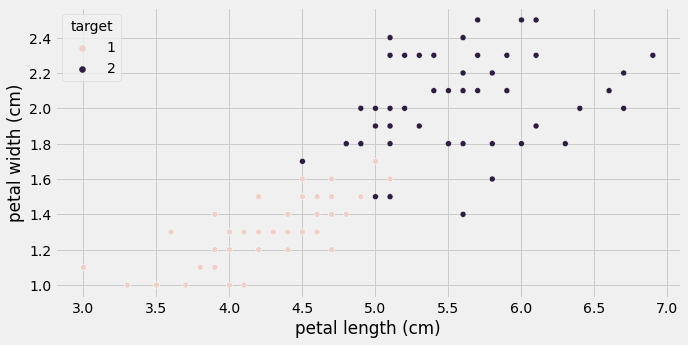

In [23]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='target', data=data);

In [26]:
from sklearn.svm import LinearSVC

#Extract the "petal length (cm)" and "petal width (cm)" columns of data and assign it to X.
X = data[['petal length (cm)', 'petal width (cm)']]
y = np.ravel(data[['target']])

#Fit a model on X and y.
model = LinearSVC()
model.fit(X, y)

LinearSVC()

 note: Good job! You've successfully fit a classifier to predict flower type!

#### 2 B:- Predicting using a classification model
Now that you have fit your classifier, let's use it to predict the type of flower (or class) for some newly-collected flowers.

Information about petal width and length for several new flowers is stored in the variable targets. Using the classifier you fit, you'll predict the type of each flower.

In [27]:
targets = pd.read_csv('./dataset/iris_target.csv', index_col=0)

[2 2 2 1 1 2 2 2 2 1 2 1 1 2 1 1 2 1 2 2]


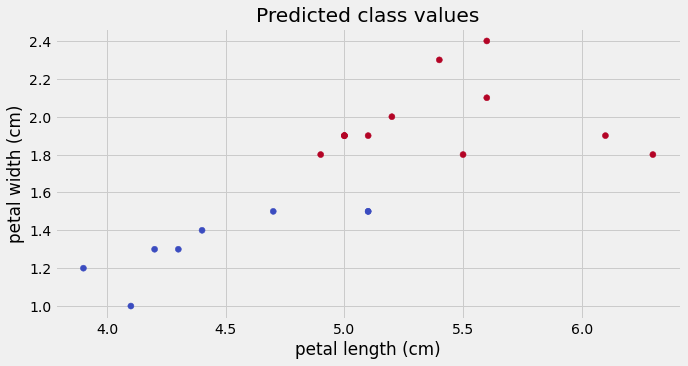

In [30]:
# Predict the flower type using the array X_predict.
# Create input array
X_predict = targets[['petal length (cm)', 'petal width (cm)']]
predictions = model.predict(X_predict)
print(predictions)

# Run the given code to visualize the predictions.
# Visualize predictions and actual values

plt.scatter(X_predict['petal length (cm)'], X_predict['petal width (cm)'], 
            c=predictions, cmap=plt.cm.coolwarm);
plt.xlabel('petal length (cm)');
plt.ylabel('petal width (cm)');
plt.title("Predicted class values");

note: Good job! Note that the output of your predictions are all integers, representing that datapoint's predicted class.

#### 2 C: Fitting a simple model: regression
In this exercise, you'll practice fitting a regression model using data from the Boston housing market. A DataFrame called boston is available in your workspace. It contains many variables of data (stored as columns). Can you find a relationship between the following two variables?

"AGE": proportion of owner-occupied units built prior to 1940
"RM" : average number of rooms per dwelling

In [31]:
boston = pd.read_csv('./dataset/boston.csv', index_col=0)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


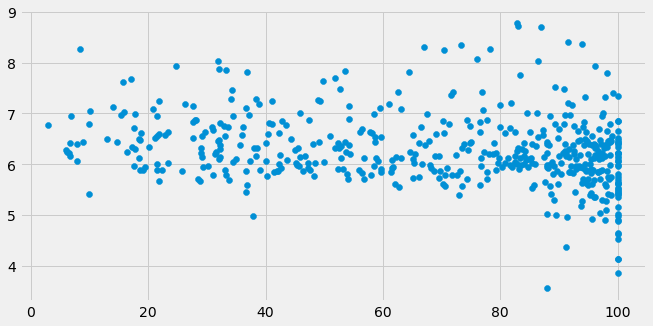

In [32]:
plt.scatter(boston["AGE"], boston["RM"])

In [38]:
from sklearn import linear_model

# Prepare X and y DataFrames using the data in boston.
# X should be the proportion of houses built prior to 1940, y average number of rooms per dwelling.
X = boston[['AGE']]
y = boston[['RM']]

# Fit a regression model that uses these variables (remember to shape the variables correctly!).
# Don't forget that each variable must be the correct shape for scikit-learn to use it!

model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

note: Good job! In regression, the output of your model is a continuous array of numbers, not class identity.

#### 2 D: Predicting using a regression model

Now that you've fit a model with the Boston housing data, lets see what predictions it generates on some new data. You can investigate the underlying relationship that the model has found between inputs and outputs by feeding in a range of numbers as inputs and seeing what the model predicts for each input.

A 1-D array new_inputs consisting of 100 "new" values for "AGE" (proportion of owner-occupied units built prior to 1940) is available in your workspace along with the model you fit in the previous exercise.

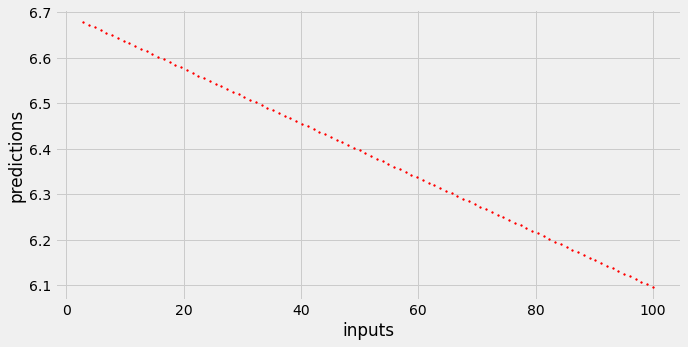

In [45]:
# Review new_inputs in the shell.
new_inputs = np.array(pd.read_csv('./dataset/boston_newinputs.csv', index_col=0, header=None).values)

# Reshape new_inputs appropriately to generate predictions.
predictions = model.predict(new_inputs.reshape(-1, 1))

# Run the given code to visualize the predictions.
plt.scatter(new_inputs, predictions, color='r', s=3);
plt.xlabel('inputs');
plt.ylabel('predictions');

note: Good job! Here the red line shows the relationship that your model found. As the proportion of pre-1940s houses gets larger, the average number of rooms gets slightly lower.

### 3 : Machine learning and time series data
 - Combining timeseries data with machine learning
 
In the final lesson of this chapter, we'll discuss the interaction between machine learning and timeseries data, and introduce why they're worth thinking about in tandem.



#### 3 A: Inspecting the classification data
In these final exercises of this chapter, you'll explore the two datasets you'll use in this course.

The first is a collection of heartbeat sounds. Hearts normally have a predictable sound pattern as they beat, but some disorders can cause the heart to beat abnormally. This dataset contains a training set with labels for each type of heartbeat, and a testing set with no labels. You'll use the testing set to validate your models.

As you have labeled data, this dataset is ideal for classification. In fact, it was originally offered as a part of a public Kaggle competition.

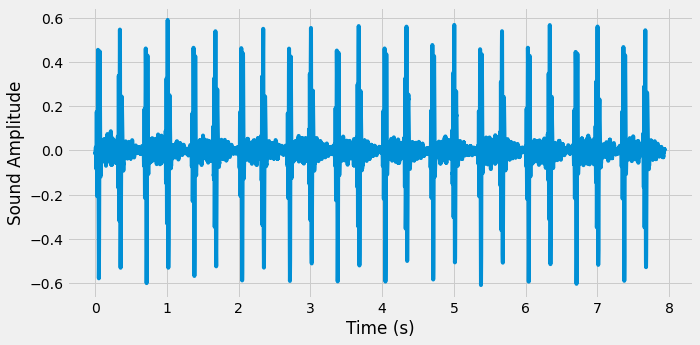

In [49]:
import librosa as lr
from glob import glob

#Use glob to return a list of the .wav files in data_dir directory
# List all the wav files in the folder
#Import the first audio file in the list using librosa.
audio_files = glob('./dataset/files/*.wav')

audio, sfreq = lr.load(audio_files[0])


#(Time array type II
# len(audio - 1) / sfreq,or  np.linspace(0, final_time, sfreq)
# final_time= len(audio - 1) / sfreq
# time = np.linspace(0, final_time, sfreq))


# Generate a time array for the data. Time array type I
time = np.arange(0, len(audio))/ sfreq

# Plot the waveform for this file, along with the time array.
fig, ax = plt.subplots();
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude');

 note: Good job! There are several seconds of heartbeat sounds in here, though note that most of this time is silence. A common procedure in machine learning is to separate the datapoints with lots of stuff happening from the ones that don't.

#### 3 B: Inspecting the regression data
The next dataset contains information about company market value over several years of time. This is one of the most popular kind of time series data used for regression. If you can model the value of a company as it changes over time, you can make predictions about where that company will be in the future. This dataset was also originally provided as part of a public Kaggle competition.

In this exercise, you'll plot the time series for a number of companies to get an understanding of how they are (or aren't) related to one another.

                  AAPL  FB       NFLX          V        XOM
time                                                       
2010-01-04  214.009998 NaN  53.479999  88.139999  69.150002
2010-01-05  214.379993 NaN  51.510001  87.129997  69.419998


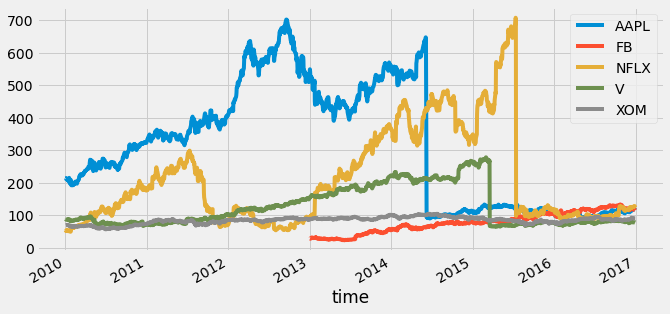

In [56]:
# Import the data with Pandas (stored in the file 'prices.csv').
data = pd.read_csv('./dataset/prices_nyse.csv', index_col=0)
print(data.head(2))
# Convert the index of data to datetime.
data.index = pd.to_datetime(data.index)
# Loop through each column of data and plot the the column's values over time.
fig, ax = plt.subplots();
for column in data.columns:
    data[column].plot(ax=ax, label=column);
ax.legend();

note: Good job! Note that each company's value is sometimes correlated with others, and sometimes not. Also note there are a lot of 'jumps' in there - what effect do you think these jumps would have on a predictive model?